# <center><font color = magenta>Anoop Mettu - Project 2 </font></center>
### <center>Data Set: Used Cars in India </center>

- Name: Anoop Mettu
- Date: July 2021
- Project: Python - Supervised Learning (Regression)

## Project Introduction: 
This is the second project in the AIML course curriculum. It is intended to help with understanding the process of Machine Learning, specifically the concepts of Supervised learning & regression. By way of this project, we gain hands-on experience of understanding data through explorative data anlysis. We get the dataset ready for modelling by performing data per-processing steps, including - Variable transformations, feature engineering, missing value & outlier handling, etc. 


#### Dataset intro: 
The (Used Cars) dataset holds prices and other important details about the used cars in India. It has details like Car maker name, year, horse power, distance driven, number of seats and other relevant details that potentially impact the price of a used car. 

#### Project Goal:
Our goal for this project is to understand how each of the relevant factors impact the price of used cars in the market. Using that we'd like to predict the market price of a used acurately.

# <center><font color = magenta> Python Code </font></center>

## Required packages:

#### Here are the packages needed for this project

<ol>
    <li>Numpy: For numerical operations</li>
    <li>Pandas: For creating & manipulating dataframes</li>
    <li>Matplotlib: For basic data vizualisations</li>
    <li>Seaborn: For improving the visualizations</li>
    <li>Warnings: To ensure smooth flow of plotting commands without warning interuptions</li>
    <li>Linear Regression: For running regreesion models</li>
    <li>Train Test Split: For splitting the dataset into training and testing groups and comparing model efficiency</li>
    <li>SK Learn Metrics: To test and understand the model performance</li>
        
</ol>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [2]:
%matplotlib inline
#To automatically display output of plotting commands  

warnings.filterwarnings('ignore')

plt.style.use('ggplot')
# To improve the visuals of the plots using ggplot styles.

### Reading the dataset

In [3]:
df = pd.read_csv("used_cars_data.csv", index_col='S.No.') #Using the 'S.No.' column as the index column

df_backup = df.copy() #Creating a copy to have original dataset accesible in case of any mistakes.

In [4]:
df.head()
#Examining if the data loaded correctly and understanding each of the columns

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


#### Random rows

Picking 10 random rows of the data to examine what each entry looks like and understanding the way data is available in each columns

In [5]:
np.random.seed(3)
df.sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
3719,Ford EcoSport 1.5 Petrol Titanium Plus AT,Pune,2017,14000,Petrol,Automatic,First,14.8 kmpl,1497 CC,121.36 bhp,5.0,13.23 Lakh,9.99
6096,Toyota Innova 2.5 GX (Diesel) 8 Seater,Delhi,2013,79999,Diesel,Manual,First,12.99 kmpl,2494 CC,100 bhp,8.0,NaN,NaN
979,Maruti Wagon R VXI BS IV,Pune,2014,51000,Petrol,Manual,First,20.51 kmpl,998 CC,67.04 bhp,5.0,NaN,3.10
4855,Skoda Octavia Elegance 2.0 TDI AT,Hyderabad,2014,36000,Diesel,Automatic,First,19.3 kmpl,1968 CC,141 bhp,5.0,NaN,16.00
1594,Maruti Swift Dzire ZXI,Kochi,2015,24782,Petrol,Manual,First,20.85 kmpl,1197 CC,83.14 bhp,5.0,NaN,6.21
3111,Maruti Swift LDI BSIV,Jaipur,2014,105000,Diesel,Manual,First,25.2 kmpl,1248 CC,74 bhp,5.0,NaN,3.85
5495,Hyundai Creta 1.6 CRDi AT SX Plus,Mumbai,2015,26000,Diesel,Automatic,First,17.01 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.65
5214,Mahindra XUV500 W8 2WD,Mumbai,2012,48000,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,NaN,6.50
3527,Hyundai Verna 1.4 EX,Hyderabad,2012,93000,Diesel,Manual,First,23.5 kmpl,1396 CC,88.7 bhp,5.0,NaN,5.55


#### Using the 'info()' function

To understand multiple aspects of each of the columns. Including - Number of non-null values, data types, number of rows & columns.  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


#### Null values

Understanding how many null values each columns has to get a sense of the completeness of the data

In [7]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

## Understanding --> Exploring --> Transforming 

From the 'info()' function we can see that out of 13 columns we currently have 2 as integer columns, 2 as float columns with the rest (9 columns) as 'object' type. However from our prior knowledge we know that Mileage, Power, number seats should ideally be of either integer or float type. Here's the plan:

- Dig into each of the columns individually and understand data they contain and the formating. 
- Make any necessary tranformations to get the data ready for modelling. 

### Let us start with Column 1: Name

In [8]:
df['Name']

S.No.
0                                  Maruti Wagon R LXI CNG
1                        Hyundai Creta 1.6 CRDi SX Option
2                                            Honda Jazz V
3                                       Maruti Ertiga VDI
4                         Audi A4 New 2.0 TDI Multitronic
                              ...                        
7248                    Volkswagen Vento Diesel Trendline
7249                               Volkswagen Polo GT TSI
7250                               Nissan Micra Diesel XV
7251                               Volkswagen Polo GT TSI
7252    Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...
Name: Name, Length: 7253, dtype: object

We can see that each of the rows(entries) in the name column give a full name of the car. 
<br> Interestingly, they follow a naming pattern with:
- Car Maker Name + Car Name + Model Name

From prior knowledge we suspect that car maker (aka Brand) could play a role in determining the price of the used car. Hence, let explore more and attempt to extract the name of the maker for each car 

In [9]:
df_name = df['Name'].str.split(' ', expand=True)
df_name

,0,1,2,3,4,5,6,7,8,9
S.No.,,,,,,,,,,
0,Maruti,Wagon,R,LXI,CNG,None,None,None,None,None
1,Hyundai,Creta,1.6,CRDi,SX,Option,None,None,None,None
2,Honda,Jazz,V,None,None,None,None,None,None,None
3,Maruti,Ertiga,VDI,None,None,None,None,None,None,None
4,Audi,A4,New,2.0,TDI,Multitronic,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen,Vento,Diesel,Trendline,None,None,None,None,None,None
7249,Volkswagen,Polo,GT,TSI,None,None,None,None,None,None
7250,Nissan,Micra,Diesel,XV,None,None,None,None,None,None


creating a new data from using the str.split command. This allows us to split the name of the car into series of strings. Note how the first column has the brand name for each of the car. We will use this to create a new column in our original data frame.

In [10]:
df['Brand_Name']=df_name[0].str.upper().astype('category')

#converting each string into upper case to avoid any differences in capitalization
#Storing the column as a categorical variable

df['Brand_Name']

S.No.
0              MARUTI
1             HYUNDAI
2               HONDA
3              MARUTI
4                AUDI
            ...      
7248       VOLKSWAGEN
7249       VOLKSWAGEN
7250           NISSAN
7251       VOLKSWAGEN
7252    MERCEDES-BENZ
Name: Brand_Name, Length: 7253, dtype: category
Categories (32, object): ['AMBASSADOR', 'AUDI', 'BENTLEY', 'BMW', ..., 'TATA', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO']

Great, now we have the Brand name for each car. Our dataset appears to have cars from quite a good number of brands. 

Let's explore:
- Total number of brands
- Corresponding number of cars of each brand.

In [11]:
car_brands = df['Brand_Name'].value_counts(dropna=False)
car_brands

MARUTI           1444
HYUNDAI          1340
HONDA             743
TOYOTA            507
MERCEDES-BENZ     380
VOLKSWAGEN        374
FORD              351
MAHINDRA          331
BMW               312
AUDI              285
TATA              228
SKODA             202
RENAULT           170
CHEVROLET         151
NISSAN            117
LAND               67
JAGUAR             48
FIAT               38
MITSUBISHI         36
MINI               31
VOLVO              28
JEEP               19
PORSCHE            19
DATSUN             17
ISUZU               5
FORCE               3
BENTLEY             2
LAMBORGHINI         1
HINDUSTAN           1
OPELCORSA           1
SMART               1
AMBASSADOR          1
Name: Brand_Name, dtype: int64

In [12]:
print(f'There are {len(car_brands)} total number of brands in our dataset')

There are 32 total number of brands in our dataset


There are quite a few car brands, and a good number of those have very small representation in the dataset, less than 100 cars each. We can simplify this by group all the brands that have less than 100 cars into new category called 'Other'. We accomplis that in two steps:
1. Create a list of car brands that have more than 100 cars
2. Create a function that takes in a brand name, checks if it has more 100 cars and transforms the others into the new category

Step 1: List of frequent brands

In [13]:
car_brands = car_brands[car_brands.values>100]
freq_brands=car_brands.index.tolist()
len(freq_brands)

15

Step 2a: Creating Function to tranform the 'Brand_Name' column.

In [14]:
def brand_name_conversion (i):
    if i in freq_brands:
        return i
    else:
        return 'Other'

Step 2b: Applying the function

In [15]:
df['Brand_Name']=df['Brand_Name'].apply(brand_name_conversion)
df['Brand_Name']=df['Brand_Name'].astype('category')

Now we can see that the number of unique car brands has drastically reduced and all the brands with less than 100 cars were grouped into the 'Other' category

In [16]:
df['Brand_Name'].value_counts(dropna=False)

MARUTI           1444
HYUNDAI          1340
HONDA             743
TOYOTA            507
MERCEDES-BENZ     380
VOLKSWAGEN        374
FORD              351
MAHINDRA          331
Other             318
BMW               312
AUDI              285
TATA              228
SKODA             202
RENAULT           170
CHEVROLET         151
NISSAN            117
Name: Brand_Name, dtype: int64

<AxesSubplot:xlabel='Brand_Name', ylabel='count'>

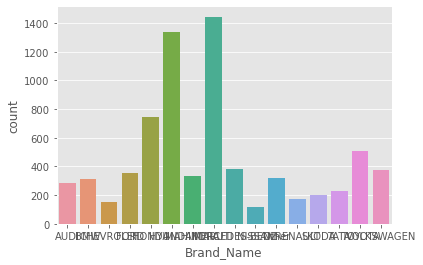

In [17]:
sns.countplot(df.Brand_Name)

### Column 2: Location

In [18]:
df['Location'].value_counts(dropna=False)

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

Here we can see that there are no missing values in the Location column and all the locations have more than 200 cars each. Hence our next step is to just convert it into categorical column.

In [19]:
df['Location']=df['Location'].astype('category')

<AxesSubplot:xlabel='Location', ylabel='count'>

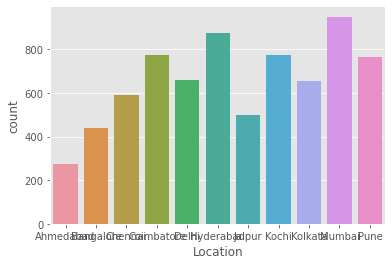

In [20]:
sns.countplot(df.Location)

### Column 3: Year

In [21]:
df.Year

S.No.
0       2010
1       2015
2       2011
3       2012
4       2013
        ... 
7248    2011
7249    2015
7250    2012
7251    2013
7252    2014
Name: Year, Length: 7253, dtype: int64

In [22]:
df.Year.isnull().sum()

0

The year columns has the year car was manufactured and has no missing values. Hence no changes here

<AxesSubplot:xlabel='Year', ylabel='count'>

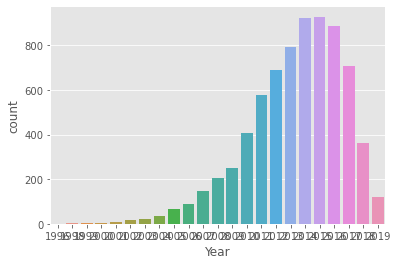

In [23]:
sns.countplot(df.Year)

<AxesSubplot:xlabel='Year'>

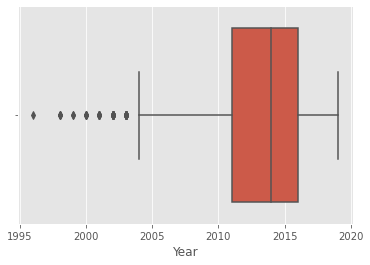

In [24]:
sns.boxplot(df.Year)

The Year columns appears to be heavily left skewed. 

In [25]:
df.Year[df.Year<2005].count()

93

In [26]:
df.Year.mean()

2013.3653660554253

In [27]:
df.Year.median()

2014.0

Since the Mean and Median are really close and we see through the box plot that there are 93 outliers, it could be benfecial for our model to drop the outliers

In [28]:
df.drop(df[df.Year<2005].index, axis=0, inplace=True)

<AxesSubplot:xlabel='Year'>

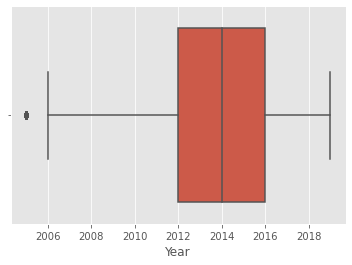

In [29]:
sns.boxplot(df.Year)

Now we see that there are far fewer outliers and the dataset is much less skewed

### Column 4: Kilometers Driven

In [30]:
df['Kilometers_Driven']

S.No.
0       72000
1       41000
2       46000
3       87000
4       40670
        ...  
7248    89411
7249    59000
7250    28000
7251    52262
7252    72443
Name: Kilometers_Driven, Length: 7160, dtype: int64

In [31]:
df['Kilometers_Driven'].isnull().sum()

0

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Count'>

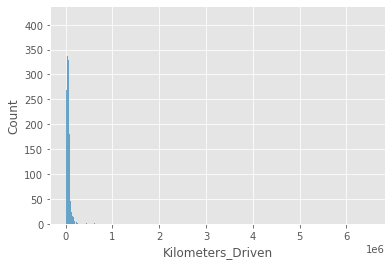

In [32]:
sns.histplot(df['Kilometers_Driven'])

The kilometers driven columns appears to be heavily right skewed and hence is a good candidate for log transformation. Log transformations help improve the distribution of the data set and aid in model building

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Count'>

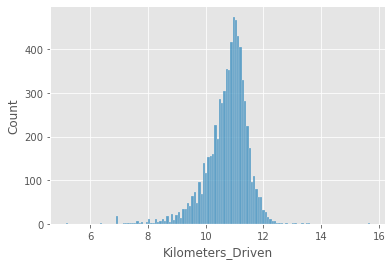

In [33]:
sns.histplot(np.log(df['Kilometers_Driven']))

In [34]:
df['Kilometer_Driven_Log']=np.log(df['Kilometers_Driven'])

Since we created a new columns for Kilometers driven, we no longer need the previous column and hence we drop it

In [35]:
df.drop('Kilometers_Driven', axis=1, inplace=True)

### Column 5: Fuel Type

In [36]:
df.Fuel_Type.value_counts(dropna=False)

Diesel      3833
Petrol      3251
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

Since the Fuel type column does not have any missing values and is a categorical variable the only thing to do here is to transform it's dtype into 'category'

In [37]:
df['Fuel_Type']=df['Fuel_Type'].astype('category')

### Column 6: Transmission

In [38]:
df['Transmission'].value_counts(dropna=False)

Manual       5121
Automatic    2039
Name: Transmission, dtype: int64

Since the Transmission column does not have any missing values either and is a categorical variable the only thing to do here is to transform it's dtype into 'category'. Later we will transform all the categorical columns by creating dummy variables through one-hot encoding

In [39]:
df['Transmission']=df['Transmission'].astype('category')

### Column 7: Owner Type

In [40]:
df['Owner_Type'].value_counts(dropna=False)

First             5921
Second            1112
Third              117
Fourth & Above      10
Name: Owner_Type, dtype: int64

Just like previous two columns Ownertype doesn't have any missing values and is also a categorical variable.

In [41]:
df['Owner_Type']=df['Owner_Type'].astype('category')

### Column 8: Mileage

In [42]:
df.Mileage

S.No.
0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
7248    20.54 kmpl
7249    17.21 kmpl
7250    23.08 kmpl
7251     17.2 kmpl
7252     10.0 kmpl
Name: Mileage, Length: 7160, dtype: object

Here we see that Mileage is saved along with the units in the data set. Hence, to transform this into a float data type, we will first have to separate the units and then save the numerical value as a float column

In [43]:
df_MilUnits=df.Mileage.str.split(' ', expand=True)
df_MilUnits

,0,1
S.No.,,
0,26.6,km/kg
1,19.67,kmpl
2,18.2,kmpl
3,20.77,kmpl
4,15.2,kmpl
...,...,...
7248,20.54,kmpl
7249,17.21,kmpl
7250,23.08,kmpl


In [44]:
df_MilUnits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7160 entries, 0 to 7252
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7158 non-null   object
 1   1       7158 non-null   object
dtypes: object(2)
memory usage: 167.8+ KB


Now we've created a new temporary data frame with the Mileage numeric and the units as two columns

In [45]:
df_MilUnits[1].value_counts(dropna=False)

kmpl     7084
km/kg      74
NaN         2
Name: 1, dtype: int64

Looking at the units columns, we understand that there are only two types of units mentioned and also that there are two missing values in this column

In [46]:
df_MilUnits[0].isnull().sum()

2

Saving the numeric column back into our original dataframe

In [47]:
df['Mileage_Per_Lt_or_KG'] = df_MilUnits[0].astype('float')

We can see that a new, float column (Mileage_Per liter or kg) has been created in the end. Now we can safely drop our old mileage column

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7160 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Name                  7160 non-null   object  
 1   Location              7160 non-null   category
 2   Year                  7160 non-null   int64   
 3   Fuel_Type             7160 non-null   category
 4   Transmission          7160 non-null   category
 5   Owner_Type            7160 non-null   category
 6   Mileage               7158 non-null   object  
 7   Engine                7120 non-null   object  
 8   Power                 7120 non-null   object  
 9   Seats                 7113 non-null   float64 
 10  New_Price             1004 non-null   object  
 11  Price                 5938 non-null   float64 
 12  Brand_Name            7160 non-null   category
 13  Kilometer_Driven_Log  7160 non-null   float64 
 14  Mileage_Per_Lt_or_KG  7158 non-null   float64 
dtypes: c

In [49]:
df.drop('Mileage', axis=1, inplace=True)

<AxesSubplot:xlabel='Mileage_Per_Lt_or_KG', ylabel='Density'>

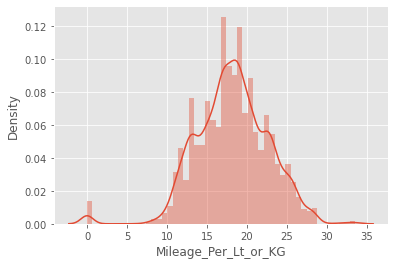

In [50]:
sns.distplot(df['Mileage_Per_Lt_or_KG'])

### Column 9: Engine

In [51]:
df['Engine']

S.No.
0        998 CC
1       1582 CC
2       1199 CC
3       1248 CC
4       1968 CC
         ...   
7248    1598 CC
7249    1197 CC
7250    1461 CC
7251    1197 CC
7252    2148 CC
Name: Engine, Length: 7160, dtype: object

Just like our Previous Mileage column, Engine column similarly has string ('CC') in each row. Hence performing the same functions as above, we will create a new 'Engine_CC' column and save it as a float type with just the numeric values in it. And then we can drop our original 'Engine' columns

In [52]:
df['Engine_CC'] = df['Engine'].str.split(' ', expand = True)[0].astype(float)

In [53]:
df['Engine_CC']

S.No.
0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
7248    1598.0
7249    1197.0
7250    1461.0
7251    1197.0
7252    2148.0
Name: Engine_CC, Length: 7160, dtype: float64

In [54]:
df.drop('Engine', axis=1, inplace=True)

<AxesSubplot:xlabel='Engine_CC', ylabel='Density'>

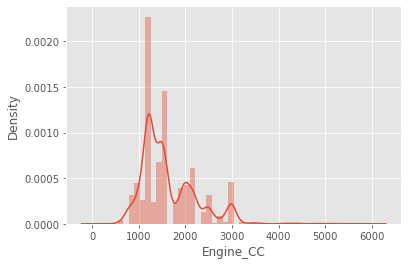

In [55]:
sns.distplot(df['Engine_CC'])

### Column 10: Power

In [56]:
df.Power

S.No.
0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
7248    103.6 bhp
7249    103.6 bhp
7250     63.1 bhp
7251    103.6 bhp
7252      170 bhp
Name: Power, Length: 7160, dtype: object

The power columns as 'bhp' that needs to be separated from it

In [57]:
df_BHP = df['Power'].str.split(' ', expand=True)
df_BHP

,0,1
S.No.,,
0,58.16,bhp
1,126.2,bhp
2,88.7,bhp
3,88.76,bhp
4,140.8,bhp
...,...,...
7248,103.6,bhp
7249,103.6,bhp
7250,63.1,bhp


In [58]:
df_BHP[1].value_counts(dropna=False)

bhp    7120
NaN      40
Name: 1, dtype: int64

In [59]:
df_BHP[0].isnull().sum()

40

In [60]:
df_BHP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7160 entries, 0 to 7252
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7120 non-null   object
 1   1       7120 non-null   object
dtypes: object(2)
memory usage: 167.8+ KB


Here we can see that all the units are in 'bhp' and there are 40 missing values

In [61]:
def Changing_null (i):
    if i=='null':
        return np.nan
    else:
        return i

In [62]:
df_BHP[0]=df_BHP[0].apply(Changing_null)

Creating a new column 'Power_bhp' and deleting the old 'Power' column

In [63]:
df['Power_bhp']=df_BHP[0].astype(float)
df.drop('Power', axis=1, inplace=True)

<AxesSubplot:xlabel='Power_bhp', ylabel='Density'>

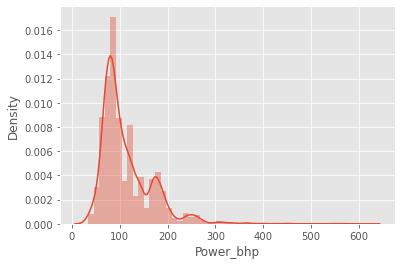

In [64]:
sns.distplot(df.Power_bhp)

In [65]:
df['Power_bhp_log']=np.log(df.Power_bhp)

<AxesSubplot:xlabel='Power_bhp_log', ylabel='Density'>

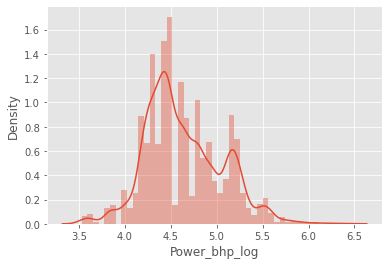

In [66]:
sns.distplot(df.Power_bhp_log)

The log transformed Power column has displays better distribution. Hence we can drop the regular power column

In [67]:
df.drop('Power_bhp', axis=1, inplace=True)

### Column 11: Number of Seats

In [68]:
df.Seats

S.No.
0       5.0
1       5.0
2       5.0
3       7.0
4       5.0
       ... 
7248    5.0
7249    5.0
7250    5.0
7251    5.0
7252    5.0
Name: Seats, Length: 7160, dtype: float64

In [69]:
df['Seats'].value_counts(dropna=False).sort_index(ascending=True)

0.0        1
2.0       18
4.0      112
5.0     5978
6.0       36
7.0      794
8.0      167
9.0        3
10.0       4
NaN       47
Name: Seats, dtype: int64

Here we can see that there are 47 missing values and 1 row with 0.0 seats. Let's examin the entry with zero seats

In [70]:
df[df.Seats==0.0]

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Brand_Name,Kilometer_Driven_Log,Mileage_Per_Lt_or_KG,Engine_CC,Power_bhp_log
S.No.,,,,,,,,,,,,,,
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,Petrol,Automatic,First,0.0,NaN,18.0,AUDI,11.736069,10.5,3197.0,NaN


Seeing the name of the car, we can understand that this is a 'Audi A4' and upon quick google search we know that it has 4 seats, hence the 0.0 must be a wrong entry. Hence let us update the seats for this entry

In [71]:
df.loc[df.Seats==0.0,'Seats']=np.nan

In [72]:
df.Seats.value_counts(dropna=False)

5.0     5978
7.0      794
8.0      167
4.0      112
NaN       48
6.0       36
2.0       18
10.0       4
9.0        3
Name: Seats, dtype: int64

<AxesSubplot:xlabel='Seats', ylabel='count'>

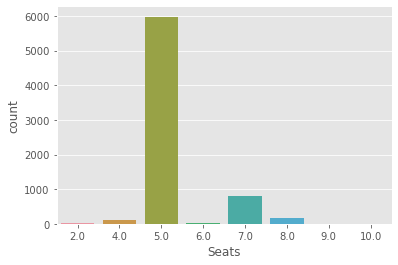

In [73]:
sns.countplot(df.Seats)

### Column 12: New(Un-used) Car Price

In [74]:
df['New_Price']

S.No.
0             NaN
1             NaN
2       8.61 Lakh
3             NaN
4             NaN
          ...    
7248          NaN
7249          NaN
7250          NaN
7251          NaN
7252          NaN
Name: New_Price, Length: 7160, dtype: object

In [75]:
df['New_Price'].isnull().sum()

6156

From the above two commands we can see that the 'New_Price' column has over 6000 missing values and the once that are not missing have strings like 'Lakh' in them. Hence we need to conver them into number and transform the column into float

In [76]:
df_NewPr = df['New_Price'].str.split(' ', expand = True)
df_NewPr

,0,1
S.No.,,
0,NaN,NaN
1,NaN,NaN
2,8.61,Lakh
3,NaN,NaN
4,NaN,NaN
...,...,...
7248,NaN,NaN
7249,NaN,NaN
7250,NaN,NaN


In [77]:
df_NewPr[1].value_counts(dropna=False)

NaN     6156
Lakh     984
Cr        20
Name: 1, dtype: int64

In [78]:
def Price2Lakhs (i):
    if i==i:
        multiplier=1
        if i.split(' ')[1].startswith('C'):
            multiplier=100
        return float(i.split(' ')[0])*multiplier
    else:
        return np.nan
            

Now we create a new column with all the 'New prices' in lakhs and drop the old column

In [79]:
df['New_Price_inLakhs']=df['New_Price'].apply(Price2Lakhs)
df.drop('New_Price', axis=1, inplace=True)

### Column 13: Price (of used car)

In [80]:
df.Price

S.No.
0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
7248      NaN
7249      NaN
7250      NaN
7251      NaN
7252      NaN
Name: Price, Length: 7160, dtype: float64

In [81]:
df.Price.isnull().sum()

1222

<AxesSubplot:xlabel='Price', ylabel='Density'>

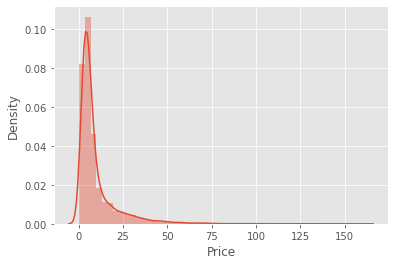

In [82]:
sns.distplot(df.Price)

Since the price column is heavily right skewed, performing a log transform can help with the model building

In [83]:
df['Price_log']=np.log(df['Price'])
df.drop('Price', axis=1, inplace=True)

<AxesSubplot:xlabel='Price_log', ylabel='Density'>

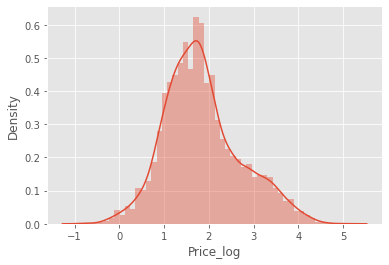

In [84]:
sns.distplot(df['Price_log'])

## Missing values

Now let's dive into handling missing values. First let us see which columns have the most number of missing values

In [85]:
df.isnull().sum()

Name                       0
Location                   0
Year                       0
Fuel_Type                  0
Transmission               0
Owner_Type                 0
Seats                     48
Brand_Name                 0
Kilometer_Driven_Log       0
Mileage_Per_Lt_or_KG       2
Engine_CC                 40
Power_bhp_log            154
New_Price_inLakhs       6156
Price_log               1222
dtype: int64

From here we can see that the 'New price' column has the highest number of missing values. Since out of 7000 rows nearly 6000 are missing, it is best to drop this column. Even though there could be a chance that the price of a brand new car affects the price of a used car, since we have very little data to work with in this column, we are forced to drop it

In [86]:
df.drop('New_Price_inLakhs', axis=1, inplace=True)

We also see that the 'Price' column has 1222 missing values. Since we plan to use this as the dependent variable, we cannot have any missing values for this. Hence, we will have to drop the rows which have 'Price' missing

In [87]:
df.drop(df[df.Price_log.isnull()].index, inplace=True)

In [88]:
df.isnull().sum()

Name                      0
Location                  0
Year                      0
Fuel_Type                 0
Transmission              0
Owner_Type                0
Seats                    37
Brand_Name                0
Kilometer_Driven_Log      0
Mileage_Per_Lt_or_KG      2
Engine_CC                30
Power_bhp_log           125
Price_log                 0
dtype: int64

Engine, Power, Seats and Mileage are the only columns that have missing values. And since all of these could potentially play an important role in deciding the price of a car, imputing the variable isn't practicle. And because the number is relatively small dropping the rows with the missing values would be the best way to handle them. Below we can see that only 129 rows out of nearly 6000 rows have missing values

In [89]:
mis_row = df[df.isnull().sum(axis=1)>0].index
mis_row

Int64Index([  76,   79,   89,  120,  143,  194,  208,  227,  229,  245,
            ...
            5458, 5529, 5533, 5755, 5759, 5861, 5873, 5893, 5925, 5985],
           dtype='int64', name='S.No.', length=129)

In [90]:
df.drop(mis_row, axis=0, inplace=True)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5809 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Name                  5809 non-null   object  
 1   Location              5809 non-null   category
 2   Year                  5809 non-null   int64   
 3   Fuel_Type             5809 non-null   category
 4   Transmission          5809 non-null   category
 5   Owner_Type            5809 non-null   category
 6   Seats                 5809 non-null   float64 
 7   Brand_Name            5809 non-null   category
 8   Kilometer_Driven_Log  5809 non-null   float64 
 9   Mileage_Per_Lt_or_KG  5809 non-null   float64 
 10  Engine_CC             5809 non-null   float64 
 11  Power_bhp_log         5809 non-null   float64 
 12  Price_log             5809 non-null   float64 
dtypes: category(5), float64(6), int64(1), object(1)
memory usage: 438.4+ KB


In [92]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
Brand_Name              0
Kilometer_Driven_Log    0
Mileage_Per_Lt_or_KG    0
Engine_CC               0
Power_bhp_log           0
Price_log               0
dtype: int64

### No more missing values

Great, we no longer have any more missing values in our dataset. Additionally, since we do not plan on using the full 'Name' of car for our model building, we can safely drop that too.

In [93]:
df.drop(['Name'], axis=1, inplace=True)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5809 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Location              5809 non-null   category
 1   Year                  5809 non-null   int64   
 2   Fuel_Type             5809 non-null   category
 3   Transmission          5809 non-null   category
 4   Owner_Type            5809 non-null   category
 5   Seats                 5809 non-null   float64 
 6   Brand_Name            5809 non-null   category
 7   Kilometer_Driven_Log  5809 non-null   float64 
 8   Mileage_Per_Lt_or_KG  5809 non-null   float64 
 9   Engine_CC             5809 non-null   float64 
 10  Power_bhp_log         5809 non-null   float64 
 11  Price_log             5809 non-null   float64 
dtypes: category(5), float64(6), int64(1)
memory usage: 393.1 KB


## Visulaization

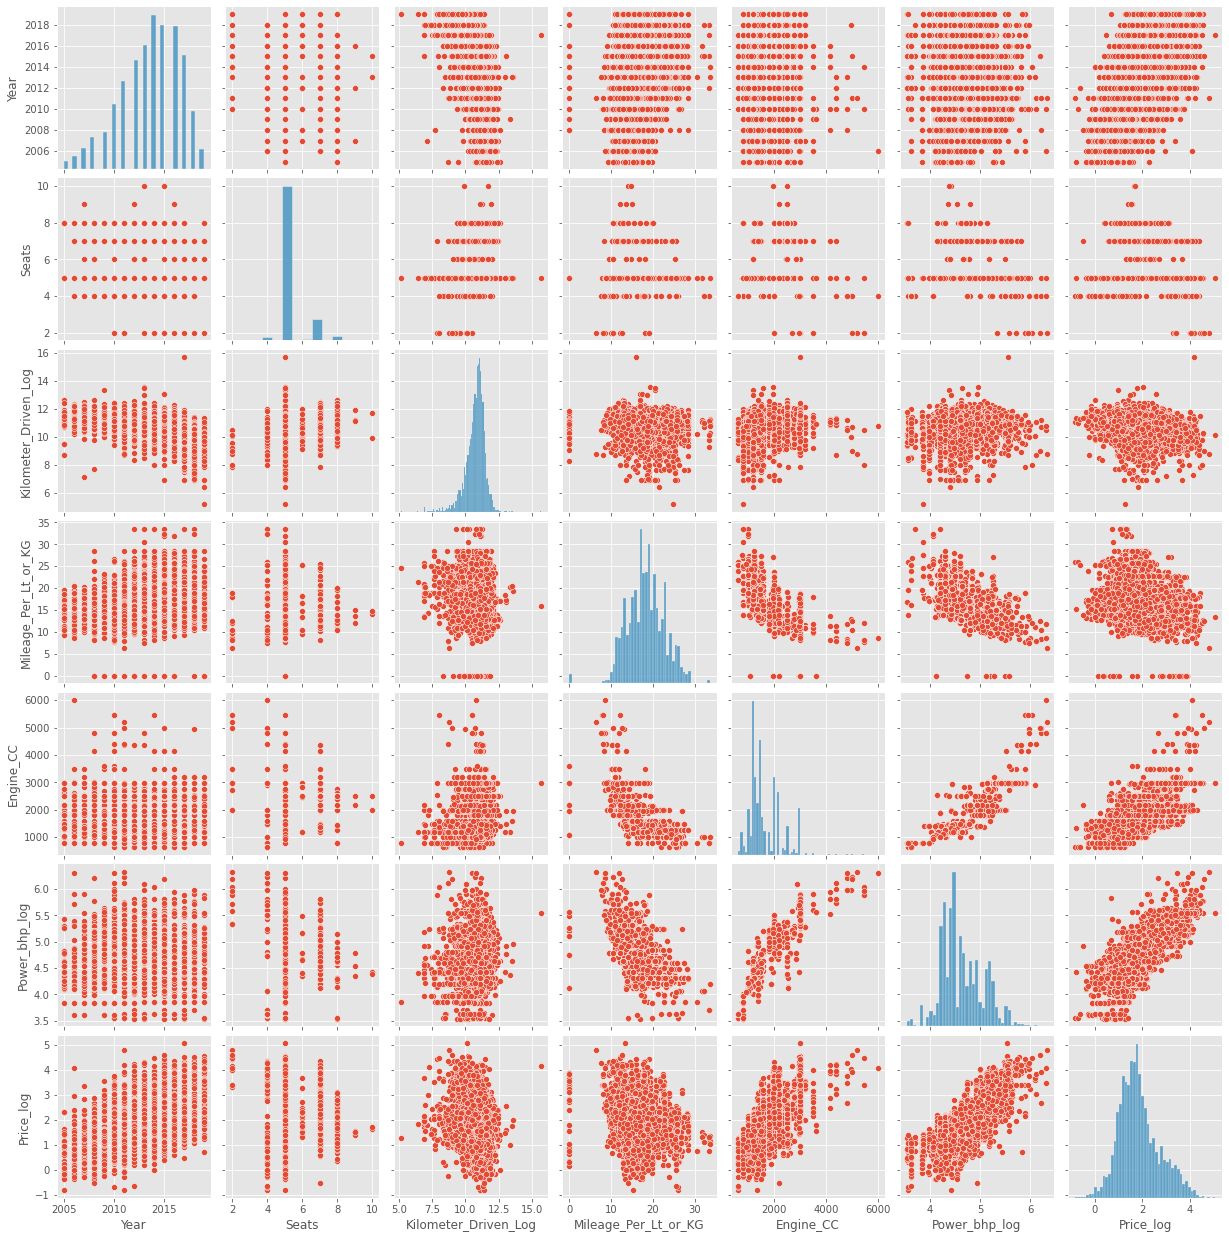

In [95]:
sns.pairplot(df)

<AxesSubplot:>

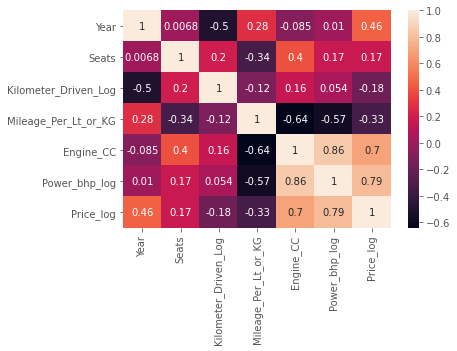

In [96]:
sns.heatmap(df.corr(), annot=True)

##### Since none of the columns have correlation above 0.9, we are not dropping any columns because of correlation

## Transforming categorical columns

Now, let's jump into one-hot encoding for our categorical columns

In [97]:
cat_col = df.columns[df.dtypes=='category']

In [98]:
df=pd.get_dummies(df, columns=cat_col)

In [99]:
df.head()

,Year,Seats,Kilometer_Driven_Log,Mileage_Per_Lt_or_KG,Engine_CC,Power_bhp_log,Price_log,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Brand_Name_MAHINDRA,Brand_Name_MARUTI,Brand_Name_MERCEDES-BENZ,Brand_Name_NISSAN,Brand_Name_Other,Brand_Name_RENAULT,Brand_Name_SKODA,Brand_Name_TATA,Brand_Name_TOYOTA,Brand_Name_VOLKSWAGEN
S.No.,,,,,,,,,,,,,,,,,,,,,
0,2010,5.0,11.184421,26.60,998.0,4.063198,0.559616,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2015,5.0,10.621327,19.67,1582.0,4.837868,2.525729,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,5.0,10.736397,18.20,1199.0,4.485260,1.504077,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2012,7.0,11.373663,20.77,1248.0,4.485936,1.791759,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,2013,5.0,10.613246,15.20,1968.0,4.947340,2.875822,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5809 entries, 0 to 6018
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       5809 non-null   int64  
 1   Seats                      5809 non-null   float64
 2   Kilometer_Driven_Log       5809 non-null   float64
 3   Mileage_Per_Lt_or_KG       5809 non-null   float64
 4   Engine_CC                  5809 non-null   float64
 5   Power_bhp_log              5809 non-null   float64
 6   Price_log                  5809 non-null   float64
 7   Location_Ahmedabad         5809 non-null   uint8  
 8   Location_Bangalore         5809 non-null   uint8  
 9   Location_Chennai           5809 non-null   uint8  
 10  Location_Coimbatore        5809 non-null   uint8  
 11  Location_Delhi             5809 non-null   uint8  
 12  Location_Hyderabad         5809 non-null   uint8  
 13  Location_Jaipur            5809 non-null   uint8

### Model building

#### Creating dependent ( y ) & independent ( x ) variables 

In [101]:
x=df.drop('Price_log', axis=1)
y=df[['Price_log']]

#### Creating training & testing datasets

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

#### Initiating the regression model

In [103]:
reg_mod = LinearRegression()

#### Fitting the model with training data

In [104]:
reg_mod.fit(x_train, y_train)

LinearRegression()

#### Checking the model performance with training data

Here we can see that the model predicts the price with 92% accuracy. This is really high, and on problem could be over fitting. To see if there is overfitting we need to test the accuracy on testing data

In [105]:
reg_mod.score(x_train, y_train)

0.9248124575995867

Our model has similar (92%) accuracy on the testing data as well. This means that the model is capture 'information' and not 'noise'

In [106]:
reg_mod.score(x_test,y_test)

0.927416486014562

# Coefficients

Now let us explore which factors play the biggest role in predicting the price

In [107]:
reg_mod.intercept_.flatten()

array([-240.15928935])

In [108]:
reg_mod.coef_.flatten()
#getting the list of coefficients

array([ 1.18483663e-01,  1.95895644e-02, -6.65094493e-02, -9.50058207e-03,
        1.44876917e-04,  8.43054976e-01,  1.02583941e-02,  1.60119522e-01,
        3.69804814e-02,  1.00932613e-01, -5.82611307e-02,  1.34099456e-01,
       -4.29056724e-02, -3.84325412e-02, -2.29163627e-01, -4.77755518e-02,
       -2.58519440e-02, -3.03458102e-02,  1.54727176e-01, -1.11022302e-16,
       -4.71027550e-02, -7.72786111e-02,  6.59783976e-02, -6.59783976e-02,
        6.88716698e-02, -2.59648299e-02,  8.23992077e-03, -5.11467607e-02,
        4.36813992e-01,  4.32317213e-01, -3.89814302e-01, -1.28333871e-01,
       -1.04342084e-01, -8.53187599e-02, -2.13119429e-01, -2.03460363e-02,
        4.57573324e-01, -1.25101442e-01,  3.74812291e-01, -8.78674812e-02,
       -9.10317234e-02, -4.90019690e-01,  1.34927295e-01, -1.01149297e-01])

In [109]:
coef_list = np.append(reg_mod.intercept_.flatten(),reg_mod.coef_.flatten())
coef_list

array([-2.40159289e+02,  1.18483663e-01,  1.95895644e-02, -6.65094493e-02,
       -9.50058207e-03,  1.44876917e-04,  8.43054976e-01,  1.02583941e-02,
        1.60119522e-01,  3.69804814e-02,  1.00932613e-01, -5.82611307e-02,
        1.34099456e-01, -4.29056724e-02, -3.84325412e-02, -2.29163627e-01,
       -4.77755518e-02, -2.58519440e-02, -3.03458102e-02,  1.54727176e-01,
       -1.11022302e-16, -4.71027550e-02, -7.72786111e-02,  6.59783976e-02,
       -6.59783976e-02,  6.88716698e-02, -2.59648299e-02,  8.23992077e-03,
       -5.11467607e-02,  4.36813992e-01,  4.32317213e-01, -3.89814302e-01,
       -1.28333871e-01, -1.04342084e-01, -8.53187599e-02, -2.13119429e-01,
       -2.03460363e-02,  4.57573324e-01, -1.25101442e-01,  3.74812291e-01,
       -8.78674812e-02, -9.10317234e-02, -4.90019690e-01,  1.34927295e-01,
       -1.01149297e-01])

Let us create an elegant dataframe to understand coefficients and their corresponding columns

In [110]:
indx_list=['Intercept']+x_train.columns.tolist()

In [111]:
coeff_df = pd.DataFrame(coef_list, index=indx_list, columns=['Coefficients'])

In [112]:
coeff_df.sort_values(by='Coefficients', ascending=False)

,Coefficients
Power_bhp_log,8.430550e-01
Brand_Name_MERCEDES-BENZ,4.575733e-01
Brand_Name_AUDI,4.368140e-01
Brand_Name_BMW,4.323172e-01
Brand_Name_Other,3.748123e-01
Location_Bangalore,1.601195e-01
Fuel_Type_Diesel,1.547272e-01
Brand_Name_TOYOTA,1.349273e-01
Location_Hyderabad,1.340995e-01
Year,1.184837e-01


# Conclusion & Recommendation:

#### Here we can see the factors influecing the price the most are:
1. Power
2. Brand Names - Mercedes, Audi, BMW
3. Location - Bangalore


#### My key advice for 'Cars4U' would be:
- To focus on high powered cars first and foremost.
- Focusing on cars from Mercedes, Audi, BMW which have greater likelhood to be priced well
- Locations like Bangalore & Hyderabad seem to be yielding good price for used cars